In [1]:
#Importing the common EDA libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set()

In [2]:
# Exploratory data analysis, as the term suggests entails exploring data wherein summary statistics of the data are obtained.
# As per the problem statement of Rossman Store Sales,"Rossmann store managers are tasked with predicting their daily sales 
# for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and 
# state holidays, seasonality, and locality."
# For the purpose of EDA, we'll look at two files: train.csv and store.csv
# First let's look at train.csv

train=pd.read_csv('train.csv')       #importing the file
print(train.head())                  #first five rows of the data 

C:\Users\Siddharth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [3]:
# After having a first look at the data, one would proceed to form a hypothsis about it, which may not necessarily be correct 
# These are tested for correctness during the course of the EDA exercise.
# For this particular data, following hypothesis is formed:
#     1. Sales would be weak on the weekends when the stores are mostly closed.
#     2. Sales and Customers would be linearly related. More Customers, more sales.
#     3. More sales on days on which promo is available.
#     4. More sales expected on the days on which there is state/school holiday, but the store is open.

In [4]:
# Let's now look at store.csv and update our hypothesis based on observations in the data in this file
store=pd.read_csv('store.csv',parse_dates=True,index_col=0)
print(store.head())

      StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
Store                                                                        
1             c          a               1270.0                        9.0   
2             a          a                570.0                       11.0   
3             a          a              14130.0                       12.0   
4             c          c                620.0                        9.0   
5             a          a              29910.0                        4.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
Store                                                                       
1                        2008.0       0              NaN              NaN   
2                        2007.0       1             13.0           2010.0   
3                        2006.0       1             14.0           2011.0   
4                        2009.0       0              NaN            

In [5]:
# Hypothesis is as follows:
#     1. Sales should increase with increase in competition distance
#     2. Sales before the opening of competitor should be more than that after opening.
#     3. Months in which promo2 is available should see more sales
#     4. Sales before promo2 became availabe should be less than that after.

# Additionally, it would be interesting to analyse sales with respect to the store and assortment type.

In [6]:
# Identification of variables is an important part of EDA. We will claasify our variables on the basis of whether they are 
# exploratory(independent) or respone(dependent). Variable can further be quantitative or categorical.
# In this case, clearly, 'Sales' is the respone variable and it is quantitative.
# Let's check the data types of the variables and the categories into which they fit.
print(train.info())
print(store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYea

In [7]:
# Store                        : Categorical   Explanatory
# DayOfWeek                    : Categorical   Explanatory
# Date                         : Categorical   Explanatory
# Sales                        : Quantitative  Response
# Customers                    : Quantitative  Response
# Open                         : Categorical   Explanatory
# Promo                        : Categorical   Explanatory
# StateHoliday                 : Categorical   Explanatory
# SchoolHoliday                : Categorical   Explanatory

# StoreType                    : Categorical   Explanatory
# Assortment                   : Categorical   Explanatory
# CompetitionDistance          : Quantitative  Explanatory  
# CompetitionOpenSinceMonth    : Categorical   Explanatory
# CompetitionOpenSinceYear     : Categorical   Explanatory
# Promo2                       : Categorical   Explanatory
# Promo2SinceWeek              : Categorical   Explanatory
# Promo2SinceYear              : Categorical   Explanatory
# PromoInterval                : Categorical   Explanatory

In [8]:
# Univariate Analysis: We will consider one variable at a time
# For quantitative variables, we are interested in the distribution. We will make use of histograms, box plots
# For categorical variables, we will make use of bar charts and pie charts to see their distribution

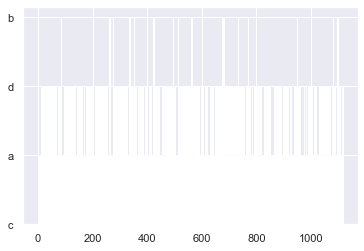

In [9]:
# Let's consider store type
fig, ax = plt.subplots()
ax.bar(store.index,store['StoreType'])
plt.show()

C:\Users\Siddharth\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Siddharth\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


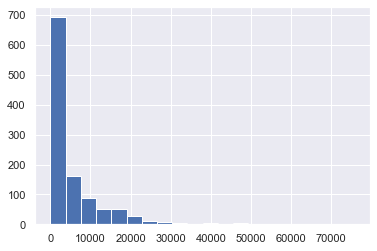

In [10]:
# Quantitative variables
# Frequency distribution of sales, customers and CompetitionDistance
plt.hist(store['CompetitionDistance'],bins=20)
plt.show()

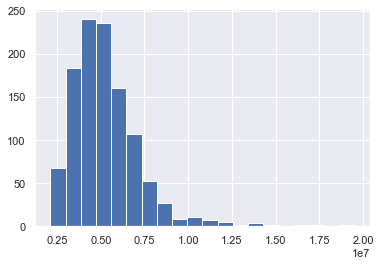

In [11]:
# Grouping sales by store to see store-wise sales distribution
sales_grouped=train.groupby(['Store'])['Sales'].sum()
plt.hist(sales_grouped,bins=20)
plt.show()

In [12]:
print(sales_grouped.describe())

count    1.115000e+03
mean     5.267427e+06
std      1.951304e+06
min      2.114322e+06
25%      3.949377e+06
50%      4.990259e+06
75%      6.084148e+06
max      1.951684e+07
Name: Sales, dtype: float64


In [13]:
train['Date']=pd.to_datetime(train['Date'])
train['month']=train['Date'].dt.strftime('%b')
train['weekday']=train['Date'].dt.strftime('%a')
print(train.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'month', 'weekday'],
      dtype='object')


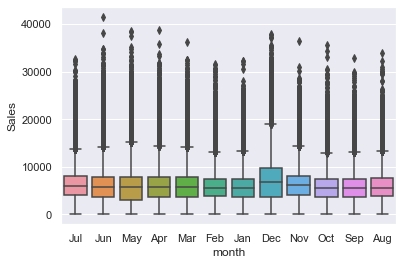

In [14]:
# Bivariate Analysis: We'll now consider two variables at a time
#C --> Q
sns.boxplot(x=train['month'],y=train['Sales'])

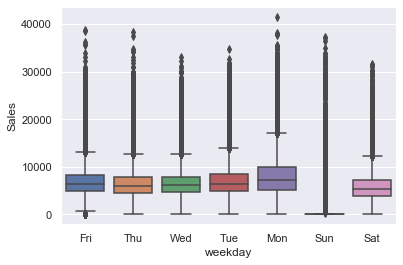

In [15]:
# December appears to have the highest median sales but there is larger variation. Also January median and IQR are significantly
# lower than those of December
sns.boxplot(x=train['weekday'],y=train['Sales'])

In [16]:
# There are virtually no sales on Sunday, whereas sales values on Saturday are significantly lower than other days.
# Also Monday has highest median sales, but larger IQR too.
# One reason why there are no sales on Sunday might be that stores are closed on Sunday. Let's check if stores are really closed
# on Sunday.
#sns.distplot(train[['weekday','Open']])

In [17]:
#plt.bar(train['weekday'],train['Open'])

In [18]:
cp = sns.countplot(x="weekday", hue="Open", data=train, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

KeyError: 0